                                                    tekst gatunek
count                                               28768   28768
unique                                              28320    2241
top     The films take place three years after the eve...   drama
freq                                                    5    5991
                                                tekst  \
0   The film opens with two bandits breaking into ...   
1   The film is about a family who move to the sub...   
2   The Rarebit Fiend gorges on Welsh rarebit at a...   
3   The film features a train traveling through th...   
4   Irish villager Kathleen is a tenant of Captain...   
5   Boone's daughter befriends an Indian maiden as...   
6   Before heading out to a baseball game at a nea...   
7   The plot is that of a black woman going to the...   
8   On a beautiful summer day a father and mother ...   
9   A thug accosts a girl as she leaves her workpl...   
10  A young couple decides to elope after b

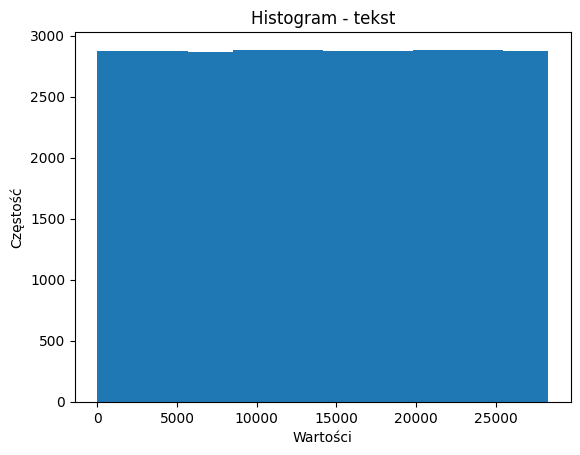

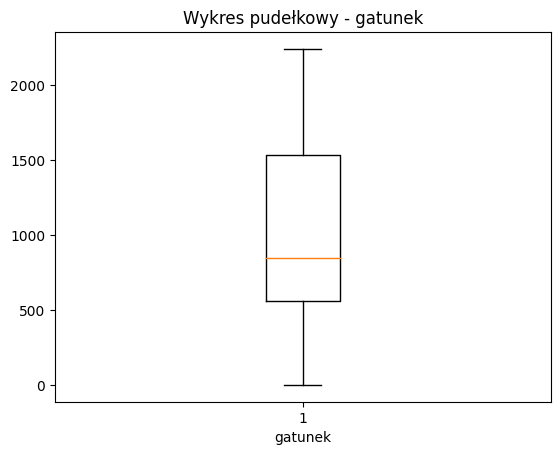

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


# Przygotowanie danych treningowych
data = pd.read_csv('dane_treningowe.csv')  # ZakĹ‚adamy, ĹĽe dane treningowe sÄ… w formacie CSV
X = data['tekst']  # Kolumna z tekstami
y = data['gatunek']  # Kolumna z gatunkami filmĂłw

print(data.describe())

print(data.head(50))  # Wyświetla pierwsze 50 wierszy danych

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['gatunek'] = label_encoder.fit_transform(data['gatunek'])
data['tekst'] = label_encoder.fit_transform(data['tekst'])

correlation_matrix = data.corr()
print(correlation_matrix)

import matplotlib.pyplot as plt

# Histogram dla kolumny 'kolumna1'
plt.hist(data['tekst'])
plt.xlabel('Wartości')
plt.ylabel('Częstość')
plt.title('Histogram - tekst')
plt.show()

# Wykres pudełkowy dla kolumny 'kolumna2'
plt.boxplot(data['gatunek'])
plt.xlabel('gatunek')
plt.title('Wykres pudełkowy - gatunek')
plt.show()


In [2]:
data = data.dropna()  # Usuwa wiersze zawierające brakujące wartości


In [3]:
# Przetasowanie danych
data_shuffled = data.sample(frac=1, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Przetasowanie zbioru danych
data_shuffled = data.sample(frac=1, random_state=42)

# Podział danych na zbiór treningowy i testowy
X = data_shuffled['tekst']
y = data_shuffled['gatunek']

X_train, X_test, y_train, y_test = train_test_split(X.astype(str), y, test_size=0.2, random_state=42)

# Rzutowanie na typ tekstowy (str)
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Wektoryzacja tekstu
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Redukcja wymiarowości danych za pomocą PCA
pca = PCA(n_components=10)  # Wybierz liczbę komponentów, która zachowuje większość wariancji danych
X_train_reduced = pca.fit_transform(X_train_vectors.toarray())
X_test_reduced = pca.transform(X_test_vectors.toarray())

# Model 1: LinearSVC
classifier_svc = LinearSVC()
classifier_svc.fit(X_train_reduced, y_train)

# Model 2: RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train_reduced, y_train)


In [ ]:
#Wynik modelu SVC:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predykcja na danych testowych
predictions = classifier_svc.predict(X_test_vectors)

# Wyznaczanie metryk
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Wyświetlanie wyników
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


In [ ]:
#Wynik modelu RFC:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predykcja na danych testowych
predictions_rf = classifier_rf.predict(X_test_vectors)

# Wyznaczanie metryk
accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='weighted')
recall_rf = recall_score(y_test, predictions_rf, average='weighted')
f1_rf = f1_score(y_test, predictions_rf, average='weighted')

# Wyświetlanie wyników
print("Random Forest Classifier:")
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)


In [ ]:
# Wprowadzenie opisu filmu przez użytkownika
opis = input("Wprowadź opis filmu: ")

# Wektoryzacja opisu wprowadzonego przez użytkownika
opis_vector = vectorizer.transform([opis])

# Predykcja gatunku filmowego dla modelu RandomForestClassifier
prediction_rf = classifier_rf.predict(opis_vector)
prediction_text_rf = classifier_rf.classes_[prediction_rf][0]

# Predykcja gatunku filmowego dla modelu LinearSVC
prediction_svc = classifier_svc.predict(opis_vector)
prediction_text_svc = classifier_svc.classes_[prediction_svc][0]

print("Przewidywany gatunek filmu dla modelu RFC:", prediction_text_rf, "oraz dla modelu SVC:", prediction_text_svc)


In [ ]:
# Zmiana wartości parametru C
classifier_svc = LinearSVC(C=0.1)
#ponowne trenowanie
classifier_svc.fit(X_train_vectors, y_train)

#Zmiana wartości parametru dla RFC:
classifier_rf = RandomForestClassifier(n_estimators=100)  # Zmiana wartości parametru n_estimators
#ponowne trenowanie
classifier_rf.fit(X_train_vectors, y_train)

In [ ]:
#Ponowna analiza po modyfikacji hiperparametrów modeli:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predykcja na danych testowych dla modelu LinearSVC
predictions_svc = classifier_svc.predict(X_test_vectors)

# Wyznaczanie metryk dla modelu LinearSVC
accuracy_svc = accuracy_score(y_test, predictions_svc)
precision_svc = precision_score(y_test, predictions_svc, average='weighted')
recall_svc = recall_score(y_test, predictions_svc, average='weighted')
f1_svc = f1_score(y_test, predictions_svc, average='weighted')

# Wyświetlanie wyników dla modelu LinearSVC
print("LinearSVC Classifier:")
print("Accuracy: ", accuracy_svc)
print("Precision: ", precision_svc)
print("Recall: ", recall_svc)
print("F1 Score: ", f1_svc)

# Predykcja na danych testowych dla modelu RandomForestClassifier
predictions_rf = classifier_rf.predict(X_test_vectors)

# Wyznaczanie metryk dla modelu RandomForestClassifier
accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='weighted')
recall_rf = recall_score(y_test, predictions_rf, average='weighted')
f1_rf = f1_score(y_test, predictions_rf, average='weighted')

# Wyświetlanie wyników dla modelu RandomForestClassifier
print("RandomForestClassifier:")
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)
